### NOTES : 

- 
- Target : I have forecast the prices using for different timeseries model 
- I have four target : Open price, close price, low price, high price
- timseries forecasting, the rest of them supplemental analysis, I can do
- predictive project timeseries forecasting using something like a linear model
- you can add some other features you wanna grab if you go advanced you could look at the different data 2014 october 2022
- Grab interest rates from 2014, identify risks
- You can focus on some seasonality, stationary trying pull an interest rate 
- All Time High $68,789.63 USD
- Volume 35,096,794,147
- Supplemental analysis : A general description for analyses that are conducted in addition to the main and sensitivity analysis with the intent to provide additional insights into the understanding of the treatment effect.

# Data Understanding

**Date** : Date of the record

**Open Price**: The opening price of the cryptocurrency on the trading day (USD)

**Close Price**: The closing price of the cryptocurrency at the end of trading day (USD)

**High:** The maximum price of the cryptocurrency on trading day (USD)

**Low:** The minimum price of the cryptocurrency on the trading day (USD)

**Adjusted Closing Price**: Stock exchanges witness buying and selling of millions of shares every minute. When the exchanges close, the last trading price of the stock is recorded as the closing price of the share

**Volume**: The sum of actual trades made during the trading day (USD)

It operates 24 hours a day nonstop.

In [54]:
# Data manipulation 
import numpy as np
import pandas as pd
import datetime
from datetime import datetime as dt

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import folium
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.dates import AutoDateLocator, ConciseDateFormatter
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('ggplot')

# Modeling & Forecasting
import itertools
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit

#statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [5]:
# Read the data from csv file
df = pd.read_csv('BTC-USD.csv',
                index_col = 'Date', parse_dates=True)

# Rename the columns 
df = df.rename(columns={'Date': 'date', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume':'volume'})
df

,open,high,low,close,Adj Close,volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-05-01,29227.103516,29329.935547,27680.792969,28091.568359,28091.568359,18655599976
2023-05-02,28087.175781,28881.298828,27924.123047,28680.537109,28680.537109,16432924527
2023-05-03,28680.494141,29259.533203,28178.388672,29006.308594,29006.308594,19122972518


# Exploration Data Analysis

In [6]:
# Check the columns are same as each other
display(df[df['close'] == df['Adj Close']].shape, df.shape)

# Drop the same columns 
df = df.drop(columns=['Adj Close'], axis=1, inplace=False)

# Display first 3 columns of head, last 3 columns of tail
display(df.head(3), df.tail(3))
display(df.info())

(3153, 6)

(3153, 6)

,open,high,low,close,volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700


,open,high,low,close,volume
Date,,,,,
2023-05-03,28680.494141,29259.533203,28178.388672,29006.308594,19122972518
2023-05-04,29031.304688,29353.185547,28694.039063,28847.710938,15548678514
2023-05-05,28855.175781,29659.476563,28848.173828,29495.498047,17805907968


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3153 entries, 2014-09-17 to 2023-05-05
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    3153 non-null   float64
 1   high    3153 non-null   float64
 2   low     3153 non-null   float64
 3   close   3153 non-null   float64
 4   volume  3153 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 147.8 KB


None

**I have date as datetime from 2014 to 2023 years, open, high, low and close columns as float, volume as integer in our dataframe.
I have 3153 entries and total 5 columns. 
I will focus on open and close price to predict future price. Both they are daily prices on the dataset.** 

### I check if the duplicated columns, missing info, null info is available in the dataframe
* It looks there is no duplicated and null info 

In [8]:
# Check duplicated columns 
display(df.duplicated().sum())

# Check how many missing info, null in the dataframe
display(df.isnull().sum())

0

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [14]:
print(f"There are {df.shape[0]} records in our timeseries")

# The idxmax() method returns a Series with the index of the maximum value for each column
print(f'Maximum value for each column:\n{df.idxmax(axis=0, skipna=True)}')
      

# Check our df shape and maximum number of each column

print("Open     number of max    : {}".format(df['open'].max()))
print("Close    number of max    : {}".format(df['close'].max()))
print("High     number of max    : {}".format(df['high'].max()))
print("Low      number of max    : {}".format(df['low'].max()))
print("Volume   number of max    : {}".format(df['volume'].max()))

# Check the unique for each column
print("Open     number of unique : {}".format(df['open'].nunique()))
print("Close    number of unique : {}".format(df['close'].nunique()))
print("High     number of unique : {}".format(df['high'].nunique()))
print("Low      number of unique : {}".format(df['low'].nunique()))
print("Volume   number of unique : {}".format(df['volume'].nunique()))

There are 3153 records in our timeseries
Maximum value for each column:
open     2021-11-09
high     2021-11-10
low      2021-11-09
close    2021-11-08
volume   2021-02-26
dtype: datetime64[ns]
Open     number of max    : 67549.734375
Close    number of max    : 67566.828125
High     number of max    : 68789.625
Low      number of max    : 66382.0625
Volume   number of max    : 350967941479
Open     number of unique : 3149
Close    number of unique : 3150
High     number of unique : 3150
Low      number of unique : 3152
Volume   number of unique : 3153


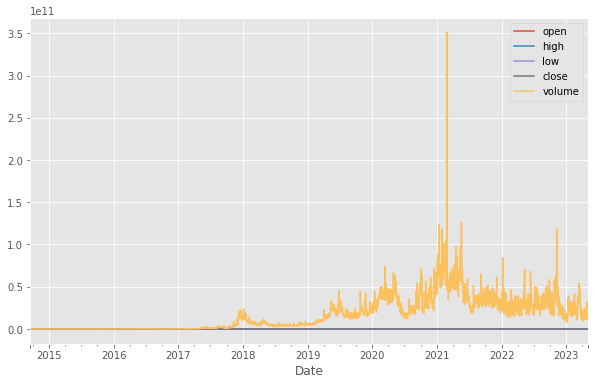

In [15]:

df.plot(figsize=(10, 6))
plt.show()

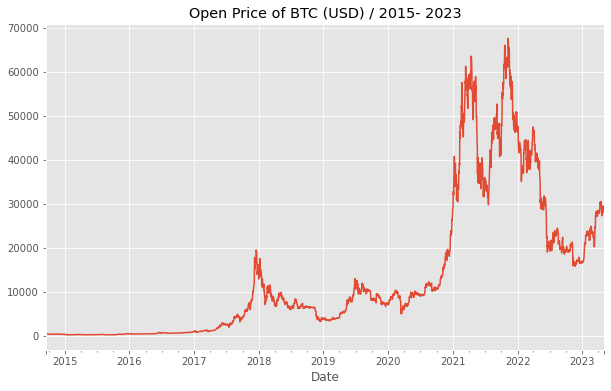

In [22]:
# Open price of Bitcoin from 2015 to 2023

df['open'].plot(y='BTC Price(USD)', title='Open Price of BTC (USD) / 2015- 2023', figsize=(10, 6))
plt.show()

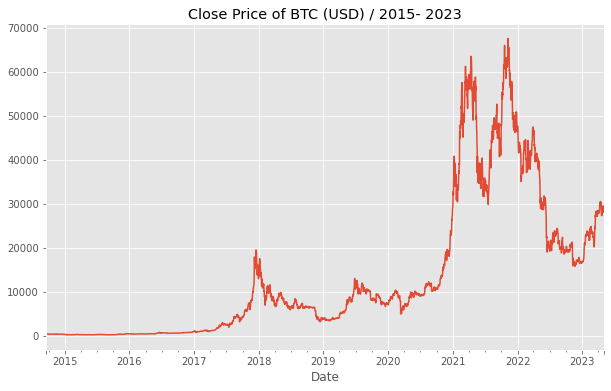

In [21]:
# Close price of Bitcoin from 2015 to 2023

df['close'].plot(y='BTC Price(USD)', title='Close Price of BTC (USD) / 2015- 2023', figsize=(10, 6))
plt.show()

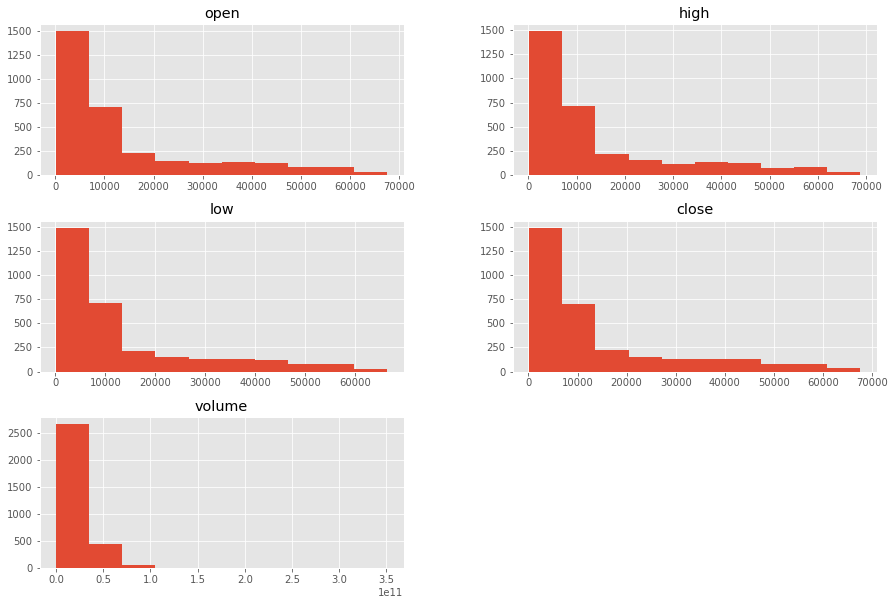

In [23]:
# Checking for normality for all columns (for stat testing)

df.hist(figsize=(15, 10))
plt.show()

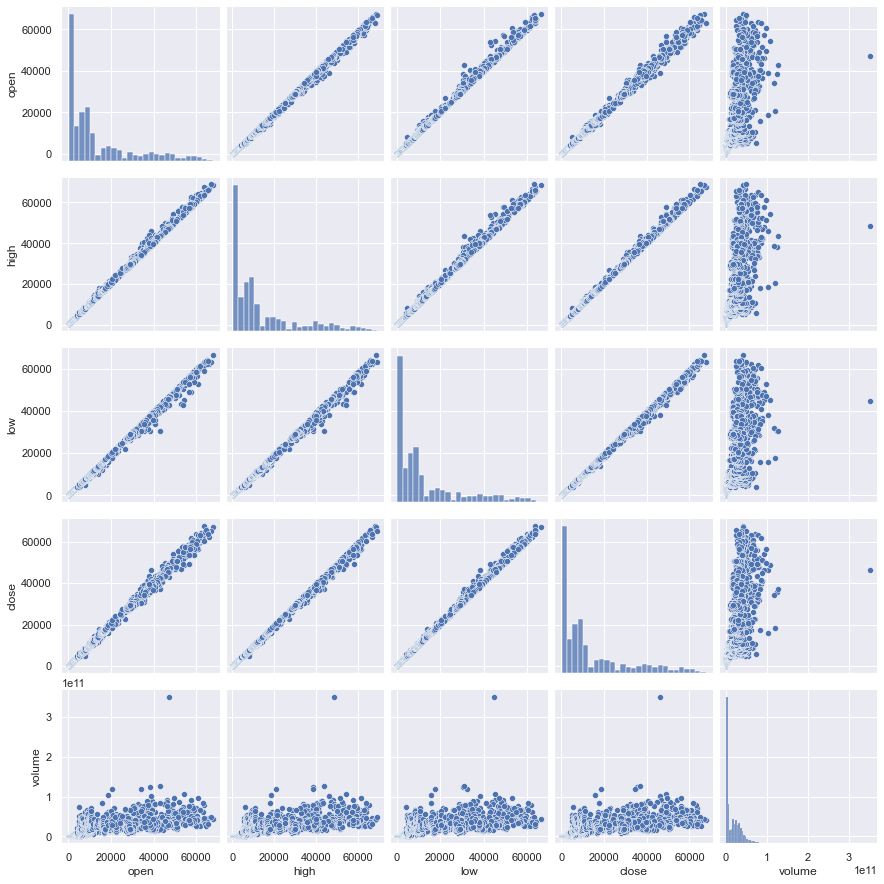

In [24]:
# Correlation all columns 
# All that straight lines, all these prices are incredibely correlated with each other
# That shows that the high price is really correlated with the open price
# Low price is really correlated the open price
# Close price is really correlated the open price
# They are coming from the same stuff, they should be correlated.

sns.set(rc={'figure.figsize':(15,15)})
sns.pairplot(data=df)

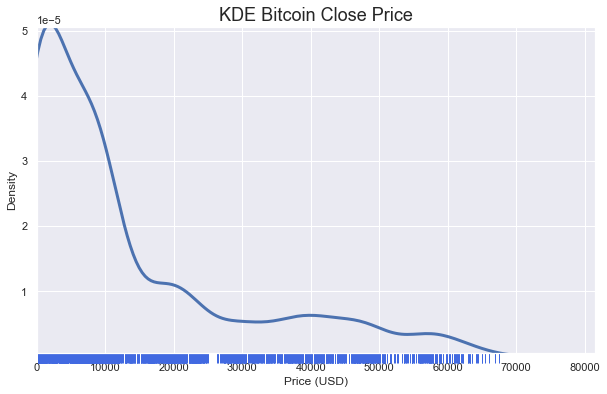

In [25]:
# Density of close price
# KDE distribution of Bitcoin closing price

fig, ax = plt.subplots(figsize=(10, 6))
p = sns.kdeplot(data=df, x='close', linewidth=3, ax=ax)
r = sns.rugplot(data=df, x='close', ax=ax, c='royalblue',
                height=-.03, clip_on=False)
p.set(xlim=(0, None))
p.set_title('KDE Bitcoin Close Price', fontsize=18)
p.set_xlabel('Price (USD)');

<AxesSubplot:title={'center':'Comparing The Percentage Change of Open Price- Close Price'}, xlabel='Date'>

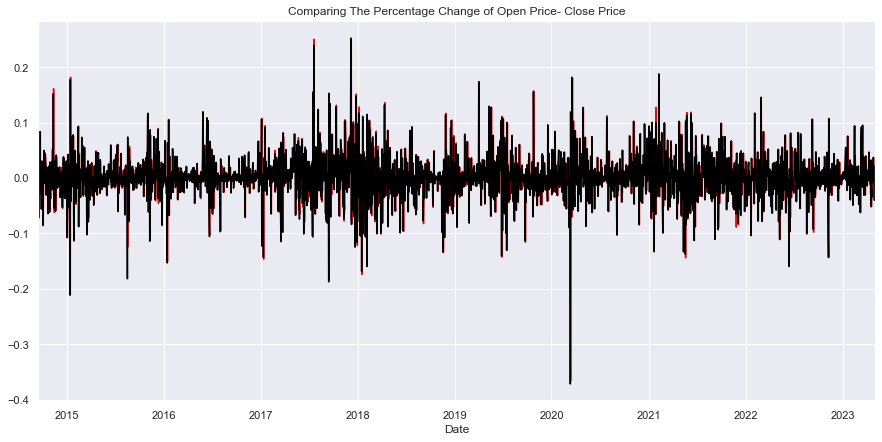

In [34]:
#Volatility
# The percentage increase both open and close price 
# daily return, changing of open price 
# changing of close price

df['open_change'] = (df['open']/df['open'].shift(1)) -1
df['close_change'] = (df['close']/df['close'].shift(1)) -1

df['open_change'].plot(title = 'Comparing The Percentage Change of Open Price- Close Price', color='red', figsize = (15, 7))
df['close_change'].plot(color='black')


<AxesSubplot:title={'center':'Daily Open-Close (Return) Price'}, xlabel='Date'>

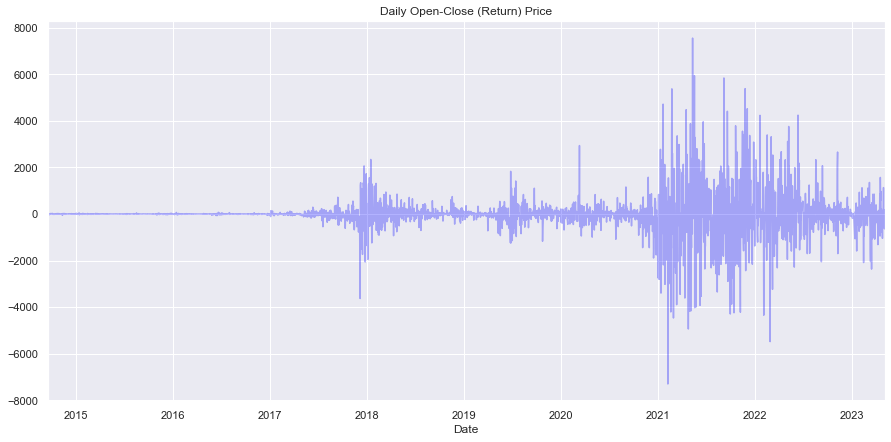

In [35]:
# Daily open close (return) price

df['open_close'] = (df['open'] - df['close'])                
df['open_close'].plot(title = 'Daily Open-Close (Return) Price', alpha = 0.3, color='blue', figsize = (15,7))

<AxesSubplot:xlabel='Date'>

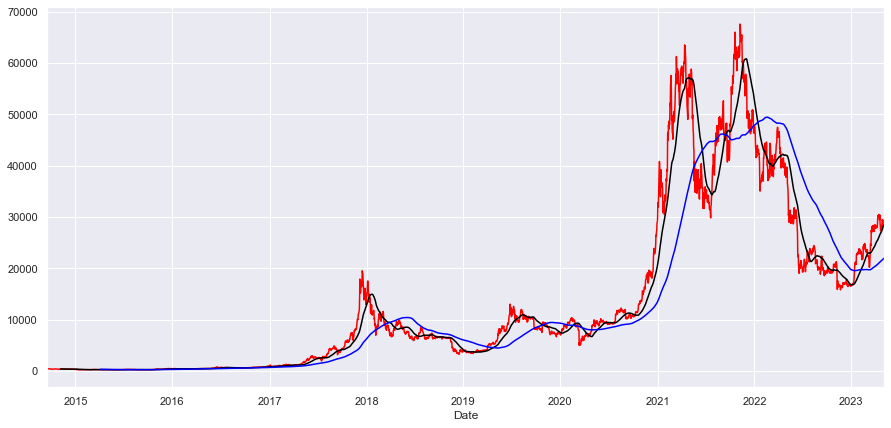

In [36]:
# Check any trend or pattern we can take the help of a 50-day 200-day average

df['MA50'] = df['close'].rolling(50).mean()
df['MA200'] = df['close'].rolling(200).mean()

df['close'].plot(color='red', figsize = (15,7))
df['MA50'].plot(color='black')
df['MA200'].plot(color='blue')

In [37]:
# We created new columns for future 
# open-change
# close-change
# open-close = Daily return price
# MA50 = Any trend 50-day average
# MA200 = Any trend 50-day average
df

,open,high,low,close,volume,open_change,close_change,open_close,MA50,MA200
Date,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,NaN,NaN,8.529999,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,-0.019328,-0.071926,32.419983,NaN,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,-0.071700,-0.069843,29.307007,NaN,NaN
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,-0.069394,0.035735,-14.230988,NaN,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.033983,-0.024659,9.263977,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-05-01,29227.103516,29329.935547,27680.792969,28091.568359,18655599976,-0.000630,-0.040222,1135.535157,28169.098789,21808.973936
2023-05-02,28087.175781,28881.298828,27924.123047,28680.537109,16432924527,-0.039002,0.020966,-593.361328,28258.758867,21856.448340
2023-05-03,28680.494141,29259.533203,28178.388672,29006.308594,19122972518,0.021124,0.011359,-325.814453,28343.963555,21906.141709


In [38]:
df.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-04-26', '2023-04-27', '2023-04-28', '2023-04-29',
               '2023-04-30', '2023-05-01', '2023-05-02', '2023-05-03',
               '2023-05-04', '2023-05-05'],
              dtype='datetime64[ns]', name='Date', length=3153, freq=None)

# Check Stationary
* I will use daily close price of Bitcoin for prediction, I don't need to resample it because it's already daily price

In [39]:
# Create close_ts, close column with date

close_ts = df['close']
close_ts

Date
2014-09-17      457.334015
2014-09-18      424.440002
2014-09-19      394.795990
2014-09-20      408.903992
2014-09-21      398.821014
                  ...     
2023-05-01    28091.568359
2023-05-02    28680.537109
2023-05-03    29006.308594
2023-05-04    28847.710938
2023-05-05    29495.498047
Name: close, Length: 3153, dtype: float64

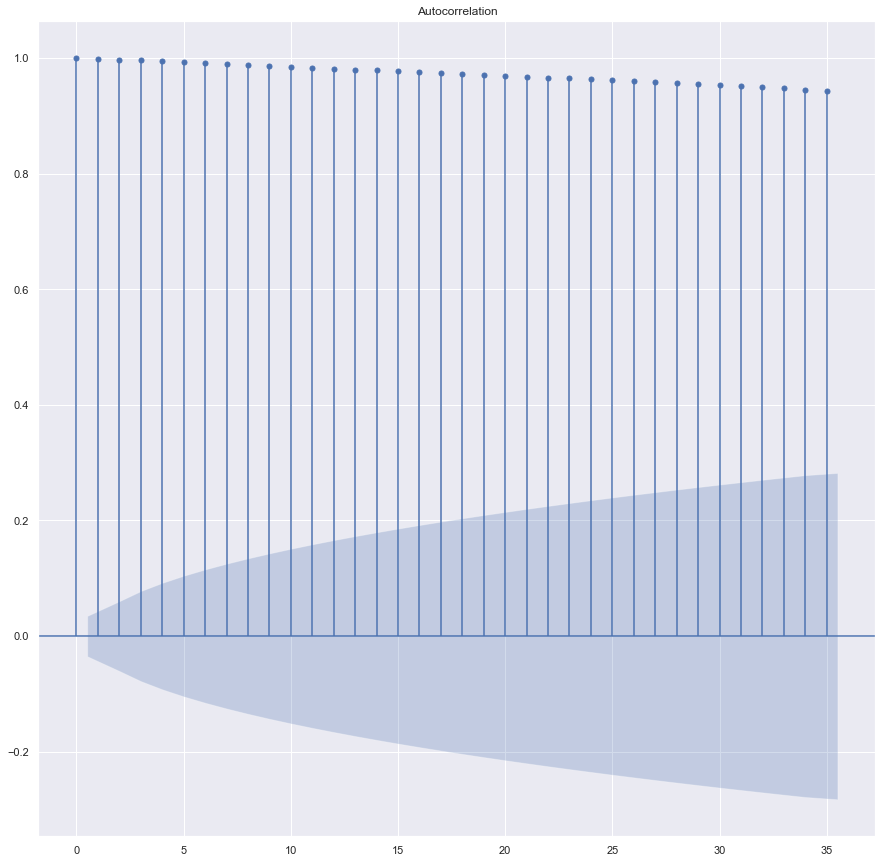

In [41]:
# Autocorrelation of close_ts
# I should take a first difference of the data to remove this autocorrelation.
plot_acf(close_ts);

In [42]:
# Check p value of our close_ts and check if it is stationary

# 1. Test Statistic, 
# 2. p-value, 
# 3. #Lags Used,
# 4. Number of Observations Used
# 5. Critical values
adfuller(close_ts)

(-1.5336037381203826,
 0.5168274345848825,
 29,
 3123,
 {'1%': -3.432445639802861,
  '5%': -2.8624659237441654,
  '10%': -2.567262891276225},
 50491.441309516646)

In [47]:
p_val = adfuller(close_ts[1:])[1]
print(f"The p-value in Dickey-Fuller statistical test is {p_val},")

if p_val < 0.05:
    print("Differenced data is stationary.")
else:
    print("Reject the null hypothesis that the differenced data is \
NOT stationary.")

The p-value in Dickey-Fuller statistical test is 0.5167428383380318,
Reject the null hypothesis that the differenced data is NOT stationary.


# Make Daily Close Price Stationary

* Open price and close price are very close each other. I will continue with closing price for prediction
* I should take a first difference of the data to remove this autocorrelation.
* Visualize the ACF and PACF to visual the differenced data

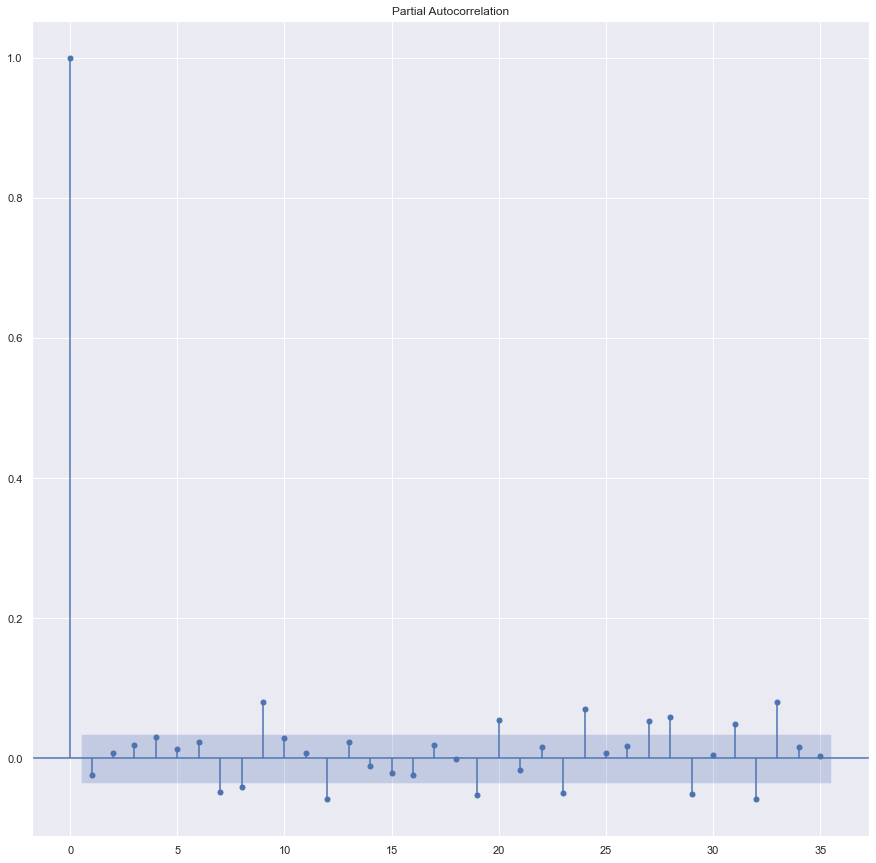

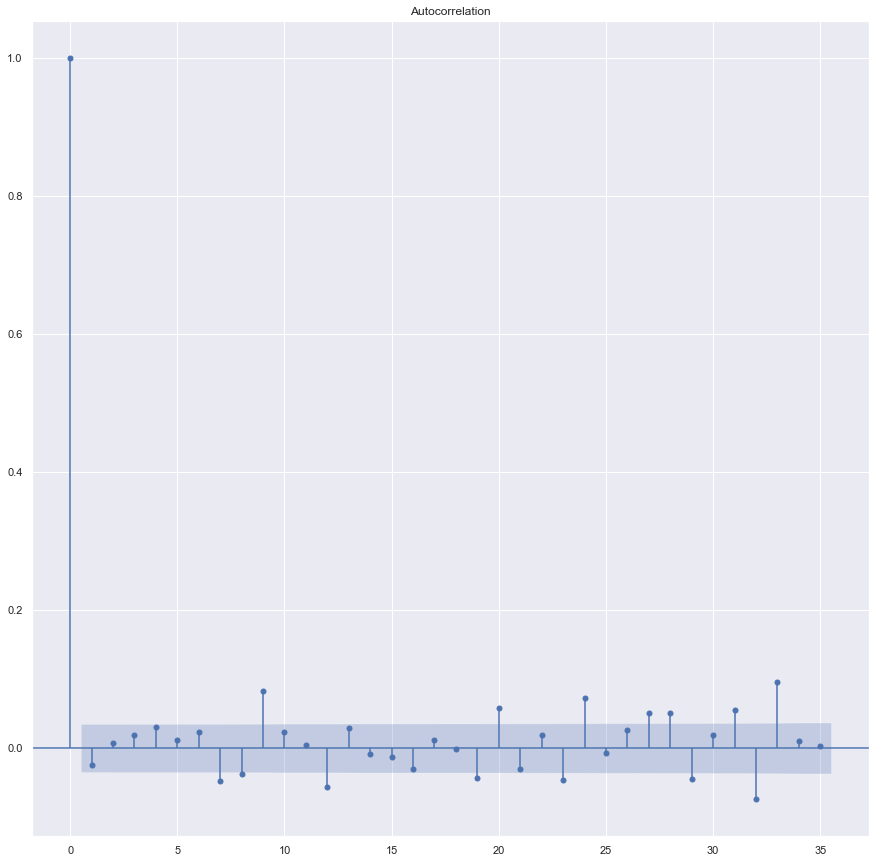

In [50]:
# PACF 
# ACF 
plot_pacf(close_ts.diff().dropna(), method='ywm')
plot_acf(close_ts.diff().dropna());

In [51]:

adfuller(close_ts.diff()[1:])

(-9.356284064249085,
 8.043183725372062e-16,
 28,
 3123,
 {'1%': -3.432445639802861,
  '5%': -2.8624659237441654,
  '10%': -2.567262891276225},
 50476.6669353725)

In [52]:
p_val = adfuller(close_ts.diff()[1:])[1]
print(f"The p-value in Dickey-Fuller statistical test is {p_val},")

if p_val < 0.05:
    print("Differenced data is stationary.")
else:
    print("Reject the null hypothesis that the differenced data is \
NOT stationary.")

The p-value in Dickey-Fuller statistical test is 8.043183725372062e-16,
Differenced data is stationary.


# SARIMAX MODEL 

In [55]:
param=(1, 1, 1)
param_sasonal=(0, 1, 1, 52)

In [56]:
p = q = range(0, 2)
pdq = list(itertools.product(p, [1], q))
seasonal_pdq = [(x[0], x[1], x[1], 52) for x in list(itertools.product(p, [1], q))]
print('Examples of parameter for SARIMA...')
for i in pdq:
    for s in seasonal_pdq:
        print('SARIMAX: {} x {}'.format(i, s))

Examples of parameter for SARIMA...
SARIMAX: (0, 1, 0) x (0, 1, 1, 52)
SARIMAX: (0, 1, 0) x (0, 1, 1, 52)
SARIMAX: (0, 1, 0) x (1, 1, 1, 52)
SARIMAX: (0, 1, 0) x (1, 1, 1, 52)
SARIMAX: (0, 1, 1) x (0, 1, 1, 52)
SARIMAX: (0, 1, 1) x (0, 1, 1, 52)
SARIMAX: (0, 1, 1) x (1, 1, 1, 52)
SARIMAX: (0, 1, 1) x (1, 1, 1, 52)
SARIMAX: (1, 1, 0) x (0, 1, 1, 52)
SARIMAX: (1, 1, 0) x (0, 1, 1, 52)
SARIMAX: (1, 1, 0) x (1, 1, 1, 52)
SARIMAX: (1, 1, 0) x (1, 1, 1, 52)
SARIMAX: (1, 1, 1) x (0, 1, 1, 52)
SARIMAX: (1, 1, 1) x (0, 1, 1, 52)
SARIMAX: (1, 1, 1) x (1, 1, 1, 52)
SARIMAX: (1, 1, 1) x (1, 1, 1, 52)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=SARIMAX(close_ts,
                         order=param,
                         seasonal_order=param_seasonal,
                         enforce_stationarity=False,
                         enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            print('Not applicable')
            continue

/Users/ocean/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ocean/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [ ]:
sari_mod =SARIMAX(close_ts,
                  param=(1, 1, 1),
                  param_sasonal=(0, 1, 1, 52),
                  enforce_stationarity=False,
                  enforce_invertibility=False).fit()

In [ ]:
sari_mod